<a href="https://colab.research.google.com/github/Meghana-kanne/NLP/blob/main/LAB_10_2__MEGHANA_2403A52247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# Load pre-trained Word2Vec model (may take time on first download)
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")

In [ ]:
word_list = [

    # Genres
    "horror", "thriller", "comedy", "mystery", "dramedy",

    # Stationary
    "books", "pen", "pencil", "eraser", "marker",

    # Vegetables
    "tomato", "potato", "carrot", "beetroot", "brinjal",

    # Languages
    "indian", "korean", "japanese", "thai", "chinese",

    # Colors
    "blue", "purple", "green", "black", "white",

    # Months
    "october", "november", "april", "january", "december",

    # Seasons
    "summer", "rainy", "winter", "autumn", "spring",

    # Fruits
    "mango", "orange", "banana", "grapes", "kiwi"
]

In [ ]:
vectors = [model_word2vec[word] for word in word_list if word in model_word2vec]

# Convert to NumPy array
vectors_word2vec = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_word2vec.shape)
print(vectors_word2vec[0])

Total selected words: 40
Vector shape: (40, 300)
[ 2.08984375e-01 -6.78710938e-02  1.27929688e-01  2.25585938e-01
 -1.38671875e-01 -3.14941406e-02 -5.66406250e-02 -8.15429688e-02
  2.87109375e-01  1.82617188e-01  7.17773438e-02 -2.83203125e-01
  8.25195312e-02  1.51367188e-01 -6.25000000e-02  3.68118286e-04
 -2.61230469e-02  1.54296875e-01 -1.25976562e-01 -4.08935547e-03
  1.24023438e-01  2.10937500e-01  2.18505859e-02 -3.49121094e-02
  2.23632812e-01 -1.72119141e-02  1.05957031e-01  5.49316406e-02
  3.26171875e-01 -1.85546875e-01 -1.42578125e-01  3.83300781e-02
  1.00097656e-02 -1.06445312e-01 -2.96875000e-01 -3.83300781e-02
  3.94531250e-01  1.48437500e-01 -1.74560547e-02  8.00781250e-02
  1.41601562e-01 -2.94921875e-01  2.24609375e-02  5.29785156e-02
 -2.28515625e-01  7.12890625e-02  3.71093750e-01  8.78906250e-02
  1.75781250e-01  1.13281250e-01 -3.00781250e-01  5.88378906e-02
 -1.89453125e-01  2.08984375e-01  1.22558594e-01 -2.33398438e-01
 -1.45507812e-01 -1.51977539e-02 -9.17968

In [ ]:
vectors = [model_glove[word] for word in word_list if word in model_glove]

# Convert to NumPy array
vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_glove.shape)
print(vectors_glove[0])

Total selected words: 40
Vector shape: (40, 100)
[-0.044891   0.27732    0.65209   -0.47268   -0.3768     0.74647
 -0.66873   -0.80967   -0.07338   -0.21013    0.069419  -0.57066
 -0.30087   -0.17311    0.28795    0.67837   -0.17238    0.55991
 -0.19411    0.71985    0.59585   -0.12383   -0.17488   -0.6351
  0.69061    0.53664    0.88466    0.053806  -0.037558  -0.33147
  0.026341  -0.44602   -1.1884     0.58497   -0.21022   -0.079939
  0.4932    -0.31713    0.085024  -0.22133   -0.33963    0.93798
 -1.0101     0.041509   0.859      0.11375    0.16966   -0.2173
  0.13943   -0.0070975 -0.33197   -0.18644    0.55696    0.6065
 -0.0076038 -1.8607    -0.0086177  1.1067     0.41222    0.1936
  0.49864    2.0962    -0.024192  -0.92603    0.62935   -0.42453
  0.081083   0.4066    -0.50426    0.22209    0.12955   -0.016974
 -0.1011     0.86758   -0.55497    1.0867     0.064534   0.38904
 -0.49881    0.19787   -0.96866    0.88081    0.40482    0.19615
 -1.1986     0.038439  -1.056     -0.43695 

APPLY T-SNE

In [ ]:
# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_word2vec)

# Store results
print("Original Shape:", vectors_word2vec.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of word2vec
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_word2vec[:5])

Original Shape: (40, 300)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[121.33091   44.916798]
 [145.70396   54.574047]
 [131.89542   84.88027 ]
 [ 83.13642    8.399818]
 [150.41599   85.277664]]

First 5 t-SNE Coordinates:
[[ 0.20898438 -0.06787109  0.12792969 ... -0.02880859  0.05639648
   0.07177734]
 [ 0.18554688 -0.02026367  0.01086426 ... -0.41015625 -0.06884766
   0.30078125]
 [-0.02954102 -0.05834961 -0.00213623 ... -0.13183594  0.09326172
   0.06298828]
 [ 0.10400391 -0.09423828  0.09570312 ...  0.13378906  0.19238281
  -0.11230469]
 [-0.01202393 -0.171875   -0.30859375 ... -0.08496094 -0.04003906
   0.33789062]]


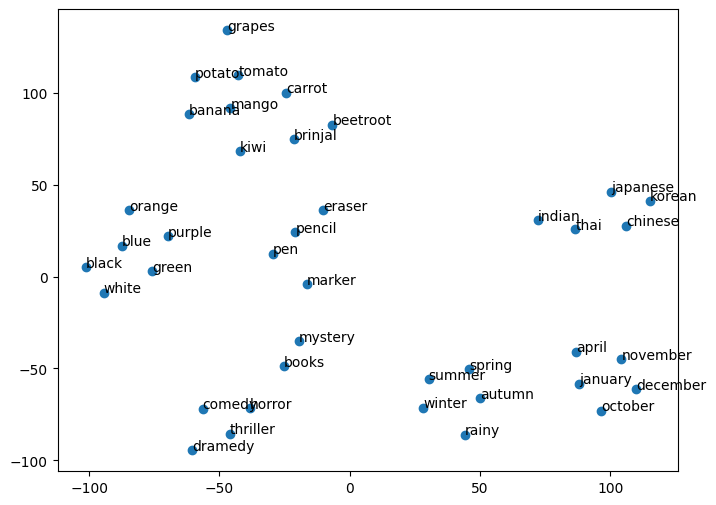

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()

In [ ]:
# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_glove)

# Store results
print("Original Shape:", vectors_glove.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of glove
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_glove[:5])

Original Shape: (40, 100)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[-38.217102 -71.63437 ]
 [-46.09779  -85.53326 ]
 [-56.466106 -71.947235]
 [-19.419615 -35.00012 ]
 [-60.593445 -94.52878 ]]

First 5 t-SNE Coordinates:
[[-4.4891e-02  2.7732e-01  6.5209e-01 -4.7268e-01 -3.7680e-01  7.4647e-01
  -6.6873e-01 -8.0967e-01 -7.3380e-02 -2.1013e-01  6.9419e-02 -5.7066e-01
  -3.0087e-01 -1.7311e-01  2.8795e-01  6.7837e-01 -1.7238e-01  5.5991e-01
  -1.9411e-01  7.1985e-01  5.9585e-01 -1.2383e-01 -1.7488e-01 -6.3510e-01
   6.9061e-01  5.3664e-01  8.8466e-01  5.3806e-02 -3.7558e-02 -3.3147e-01
   2.6341e-02 -4.4602e-01 -1.1884e+00  5.8497e-01 -2.1022e-01 -7.9939e-02
   4.9320e-01 -3.1713e-01  8.5024e-02 -2.2133e-01 -3.3963e-01  9.3798e-01
  -1.0101e+00  4.1509e-02  8.5900e-01  1.1375e-01  1.6966e-01 -2.1730e-01
   1.3943e-01 -7.0975e-03 -3.3197e-01 -1.8644e-01  5.5696e-01  6.0650e-01
  -7.6038e-03 -1.8607e+00 -8.6177e-03  1.1067e+00  4.1222e-01  1.9360e-01
   4.9864e-01  2.0962e+00 -2.

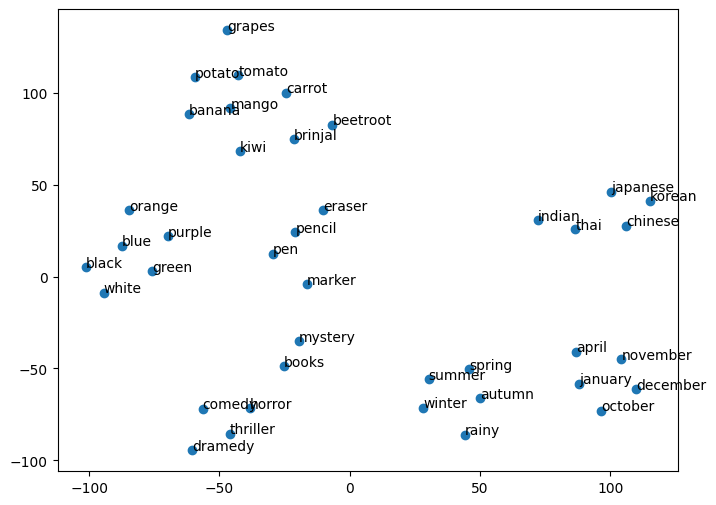

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()